In [12]:
datapath = 'tiny_mnist/'
saved_model_path = './'

In [1]:
import os
import cv2
import numpy as np

imgs = []
lbls = []
numb_label = 3

for i in range(numb_label):
  path2 = datapath+'/'+str(i)
  for filename in os.listdir(path2):
    img = cv2.imread(path2+'/'+filename, cv2.IMREAD_GRAYSCALE)
    imgs.append(img)
    lbls.append(i)

imgs = np.array(imgs)
lbls = np.array(lbls)

print('imgs', imgs.shape)
print('lbls', lbls.shape)

imgs (90, 28, 28)
lbls (90,)


### Plot dataset by label

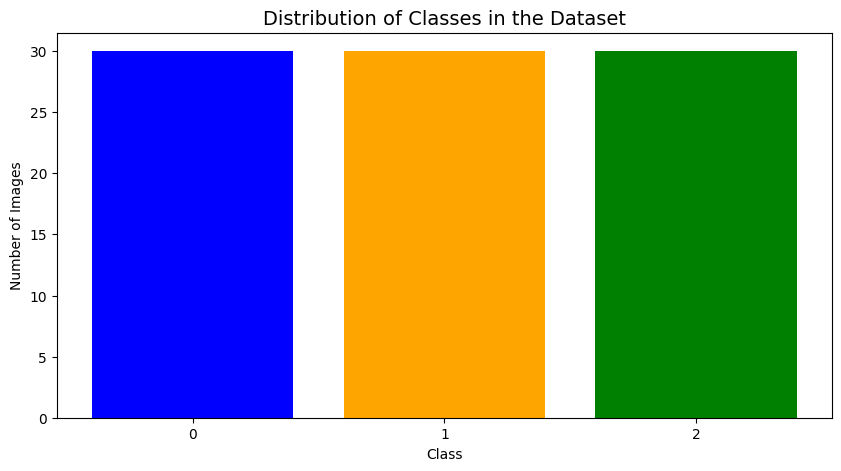

In [2]:
import matplotlib.pyplot as plt
import collections

# Count the number of images in each class
counter = collections.Counter(lbls)

# Extract the counts for each class
classes = [0, 1, 2]
counts = [counter[cls] for cls in classes]

# Plot the counts
def plot_class_distribution(classes, counts):
    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, color=['blue', 'orange', 'green'])
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Classes in the Dataset', fontsize=14)
    plt.xticks(classes)
    plt.show()

plot_class_distribution(classes, counts)

In [3]:
import torch

tx = torch.tensor(imgs, dtype=torch.float32)

img_size = tx.shape[1] * tx.shape[2]

tx = tx.reshape(-1, img_size)
ty = torch.tensor(lbls, dtype=torch.long)

print('tx', tx.shape)
print('ty', ty.shape)

tx torch.Size([90, 784])
ty torch.Size([90])


In [4]:
import torch.nn as nn
import torch.optim as optim

class MyNeuralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(28*28, 256),
        nn.Sigmoid(),
        nn.Linear(256, 128),
        nn.Sigmoid(),
        nn.Linear(128, 32),
        nn.Sigmoid(),
        nn.Linear(32, 3)
    )
    self.losses = []

  def forward(self, x):
    out = self.layers(x)
    return out

  def fit(self, x, y, epochs=1000, lr=0.01):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(self.parameters(), lr=lr)
    for epoch in range(epochs):
      optimizer.zero_grad()
      y_pred = self.forward(x)
      J = loss_fn(y_pred, y)

      if epoch % 20 == 0:
        print('Epoch: %d, J: %f' % (epoch, J.item()))

      J.backward()
      optimizer.step()
      self.losses.append(J.item())

  def predict(self, x):
    y_pred = self(x)
    y_pred = torch.argmax(y_pred, dim=1)
    return y_pred

  def evaluate(self, x, y):
    y_pred = self.predict(x)
    accuracy = (y_pred == y).sum().item() / len(y)
    return accuracy

tmp = torch.rand(100, 28*28)
model = MyNeuralModel()
y_pred = model.forward(tmp)
print('y_pred', y_pred.shape)

def numb_params(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('numb_params', numb_params(model))

y_pred torch.Size([100, 3])
numb_params 238083


### Train

In [5]:
model = MyNeuralModel()
model.fit(tx, ty, epochs=1000, lr=0.1)

Epoch: 0, J: 1.100924
Epoch: 20, J: 1.089602
Epoch: 40, J: 1.081482
Epoch: 60, J: 1.070566
Epoch: 80, J: 1.053456
Epoch: 100, J: 1.023561
Epoch: 120, J: 0.967082
Epoch: 140, J: 0.862833
Epoch: 160, J: 0.721859
Epoch: 180, J: 0.591922
Epoch: 200, J: 0.491875
Epoch: 220, J: 0.409385
Epoch: 240, J: 0.335891
Epoch: 260, J: 0.272944
Epoch: 280, J: 0.224922
Epoch: 300, J: 0.186824
Epoch: 320, J: 0.156820
Epoch: 340, J: 0.133336
Epoch: 360, J: 0.114740
Epoch: 380, J: 0.099535
Epoch: 400, J: 0.087351
Epoch: 420, J: 0.077231
Epoch: 440, J: 0.068738
Epoch: 460, J: 0.061765
Epoch: 480, J: 0.055722
Epoch: 500, J: 0.050663
Epoch: 520, J: 0.046311
Epoch: 540, J: 0.042521
Epoch: 560, J: 0.039207
Epoch: 580, J: 0.036172
Epoch: 600, J: 0.033465
Epoch: 620, J: 0.031160
Epoch: 640, J: 0.029118
Epoch: 660, J: 0.027304
Epoch: 680, J: 0.025655
Epoch: 700, J: 0.024144
Epoch: 720, J: 0.022791
Epoch: 740, J: 0.021580
Epoch: 760, J: 0.020469
Epoch: 780, J: 0.019388
Epoch: 800, J: 0.018456
Epoch: 820, J: 0.01752

#### Plot Learning

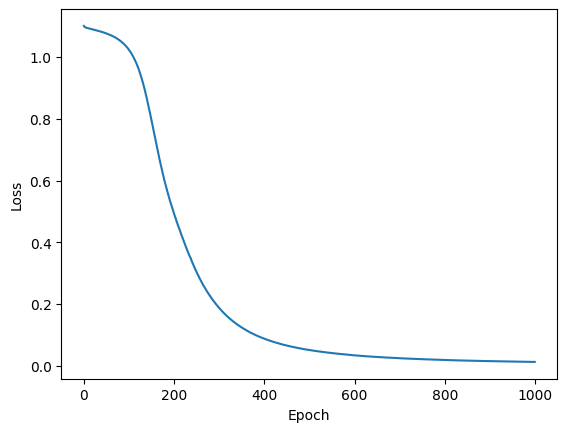

In [6]:
import matplotlib.pyplot as plot

def plot_learning(model):
  plot.plot(model.losses)
  plot.xlabel('Epoch')
  plot.ylabel('Loss')
  plot.show()

plot_learning(model)

### Evaluate model

In [7]:
acc = model.evaluate(tx, ty)
print('accuracy', acc)

accuracy 1.0


### Save the model

In [9]:
torch.save(model.state_dict(), f'{saved_model_path}model_4_2.sav')

### Load the Saved Model

In [15]:
loaded_model = MyNeuralModel()
loaded_model.load_state_dict(torch.load(f'{saved_model_path}model_4_2.sav'))

<All keys matched successfully>

### Test Model from Test Dataset

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


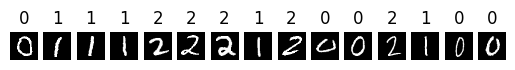

Eval tensor([[ 5.7213, -6.6539,  1.5261],
        [-7.1433,  6.0951,  1.0214],
        [-7.1838,  6.1704,  0.9853],
        [-7.1694,  6.1573,  0.9855],
        [-4.0824,  1.5883,  2.7711],
        [-0.4956, -2.2644,  3.2685],
        [-0.5836, -2.2856,  3.3788],
        [-7.0776,  6.0517,  1.0037],
        [-1.0244, -1.8733,  3.3948],
        [ 3.0213, -4.6042,  2.1525],
        [ 5.8601, -6.6356,  1.3722],
        [-2.2052,  0.0259,  2.5556],
        [-7.0141,  5.9298,  1.0682],
        [ 3.0030, -4.6791,  2.2508],
        [ 6.2505, -6.9839,  1.3331]], grad_fn=<AddmmBackward0>)


In [16]:
import matplotlib.pyplot as plot

test_imgs = []
path_test = datapath+'/test'
for filename in os.listdir(path_test):
  img = cv2.imread(path_test+'/'+filename, cv2.IMREAD_GRAYSCALE)
  test_imgs.append(img)


test_imgs = np.array(test_imgs)
print(test_imgs)
test_x = torch.tensor(test_imgs, dtype=torch.float32)
test_x = test_x.reshape(-1, 28*28)

y_pred = loaded_model.predict(test_x)

# Display images in grid of 3 column with the prediction result
for i in range(len(test_imgs)):
  plot.subplot(1, len(test_imgs), i+1)
  plot.imshow(test_imgs[i], cmap='gray')
  plot.title(y_pred[i].item())
  plot.axis('off')

plot.show()

print('Eval', loaded_model(test_x))